In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime
import string
import random

In [2]:
def linear_search(list, item):
    low = 0
    high = len(list) - 1
    
    while low <= high:
        guess = list[low]
        if guess == item:
            return low
        low = low + 1
        
    return None

In [3]:
def binary_search(list, item):
  # low and high keep track of which part of the list you'll search in.
  low = 0
  high = len(list) - 1

  # While you haven't narrowed it down to one element ...
  while low <= high:
    # ... check the middle element
    mid = (low + high) // 2
    guess = list[mid]
    # Found the item.
    if guess == item:
      return mid
    # The guess was too high.
    if guess > item:
      high = mid - 1
    # The guess was too low.
    else:
      low = mid + 1

  # Item doesn't exist
  return None

In [4]:
#Base Code from book
def quick_sort(array):
  if len(array) < 2:
    # base case, arrays with 0 or 1 element are already "sorted"
    return array
  else:
    # recursive case
    pivot = array[0]
    # sub-array of all the elements less than the pivot
    less = [i for i in array[1:] if i <= pivot]
    # sub-array of all the elements greater than the pivot
    greater = [i for i in array[1:] if i > pivot]
    return quick_sort(less) + [pivot] + quick_sort(greater)

### 1) Create the following three datasets.
Create a list of 100,000 names (randomly pick 10 characters e.g. abcdefghij, any order is fine, just make sure there are no duplicates names) and store those names in an unsorted list.
Now store the above names in a set (https://docs.python.org/3.7/library/stdtypes.html ). 
Make a separate copy of the list and sort it using any sorting algorithm that you have learned so far and justify why are you using it. Capture the time it takes to sort the list.

At this point you should have three collections:  
(1) an unsorted list of names, 
(2) a set of those same names, and 
(3) a sorted list of the same names.  

Something like this: 
names_unsrt = ['B', 'X', 'T'], 
names_set = {'B', 'X', 'T'}, and 
names_srt = ['B', 'T', 'X'] 

In [5]:
#Function to generate names
def generate (length):
    names_list = []
    for j in range(length):       
        x = ''
        
        for i in range(10):
            randomLetter = random.choice(string.ascii_letters)
            x = randomLetter + x
            string_lower = x.lower()
            
        names_list.append(string_lower)
        
    return names_list  

In [6]:
#unsorted list of names
names_unsorted = generate(100000)

In [7]:
#names set to apply hashing function to create hash values
names_set = set(names_unsorted)

In [8]:
#Quick Sort Algorithm

quickSort = []

start_time = time.time()
names_sorted = quick_sort(names_unsorted)
end_time = time.time()
qs_names = (end_time - start_time)
quickSort.append(qs_names)

In [9]:
#create dataframe for quicksort time
qs = {'Quick Sort' : quickSort}
quicksort_df = pd.DataFrame(data=qs)
quicksort_df

,Quick Sort
0,0.260534


### 2) Pick the names from the unsorted array that are at 10,000th, 30,000th, 50,000th, 70,000th, 90,000th, and 100,000th positions, and store them in a temporary array somewhere for later use. 

In [10]:
positions = [names_unsorted[9999], names_unsorted[29999], names_unsorted[49999], names_unsorted[69999], names_unsorted[89999], names_unsorted[99999]] 

In [11]:
positions

['lpgjbyazlr',
 'btnaqvknri',
 'yhnmgpwuvz',
 'xlntqqppln',
 'jyfrfbzpaw',
 'libizehcrv']

### 3) Now search for these six names in each of the collections.  Use linear search for the unsorted list, binary search for the sorted list, and use the set.remove() (or the in keyword) builtin for the set.  Capture the time it takes using all three algorithms.

In [12]:
#big o(n)

ls_times = []

for i in range(1):
    linear_time = 0
    for j in range(len(positions)):
        start = time.time()
        linear_search(names_unsorted, positions[j])
        end = time.time()
        linear_time = ((end - start) * 1000)
        ls_times.append(linear_time)
    


In [13]:
# o(log n)

bs_times = []

for i in range(1):
    binary_time = 0
    for j in range(len(positions)):
        start = time.time()
        binary_search(names_sorted, positions[j])
        end = time.time()
        binary_time = ((end - start) * 1000)
        bs_times.append(binary_time)



In [14]:
#constant time looks up Big O(1)
set_search_times = []

for i in range(1):
    set_search_time = 0
    for j in range(len(positions)):
        start = time.time()
        positions[j] in names_set
        end = time.time()
        set_search_time = ((end - start) * 1000)
        set_search_times.append(set_search_time) 

In [15]:
#how to check if something is in the set
#cannot select
#no sorting function
#can only check if something is in there or not

'xyz' in names_set

False

In [16]:
#removing item from set
#names_set.remove('wgpthsuvkl')

In [17]:
#verifying item removed
len(names_set)

100000

In [18]:
sort_times = {'Name':positions,
    'Binary Search' : bs_times,
           'Linear Search' : ls_times,
           #'merge sort': mergesort_times,
           'Hashed Search' : set_search_times}
sort_times = pd.DataFrame(data=sort_times)
sort_times


,Name,Binary Search,Linear Search,Hashed Search
0,lpgjbyazlr,0.009775,0.856876,0.000000
1,btnaqvknri,0.006914,2.665043,0.001192
2,yhnmgpwuvz,0.006199,4.518032,0.000954
3,xlntqqppln,0.004053,5.944014,0.000000
4,jyfrfbzpaw,0.004768,7.602215,0.000000
5,libizehcrv,0.005007,8.317947,0.001192


Text(0.5, 1.0, 'Time for Binary Search Algorithm')

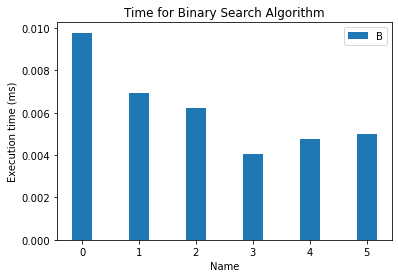

In [24]:
plt.bar(sort_times.index, sort_times['Binary Search'], 0.35)
plt.legend(('Binary Search'))
plt.ylabel('Execution time (ms)')
plt.xlabel('Name')
plt.title('Time for Binary Search Algorithm')

Text(0.5, 1.0, 'Time for Linear Search Algorithm')

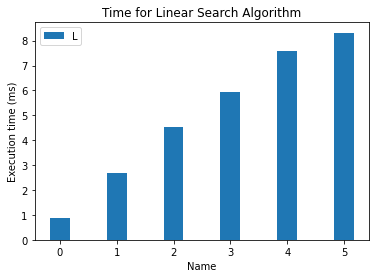

In [25]:
plt.bar(sort_times.index, sort_times['Linear Search'], 0.35)
plt.legend(('Linear Search'))
plt.ylabel('Execution time (ms)')
plt.xlabel('Name')
plt.title('Time for Linear Search Algorithm')

Text(0.5, 1.0, 'Time for Hash Function')

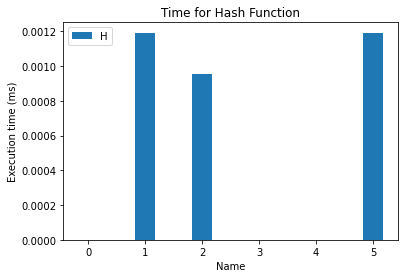

In [26]:
plt.bar(sort_times.index, sort_times['Hashed Search'], 0.35)
plt.legend(('Hashed Search'))
plt.ylabel('Execution time (ms)')
plt.xlabel('Name')
plt.title('Time for Hash Function')

# EXECUTIVE SUMMARY

### Introduction

This report analyzed the speed of the hash function by comparing it to the speed of the binary search algorithm, and by comparing it to the speed of the linear search algorithm. A set of one-hundred thousand random names were generated composed of a length of ten string characters. From this set, six names were randomly selected as the sample. The hash function and the algorithms searched for the sample set within the population set of one-hundred thousand names. 

### Hashing

The hash function inputs a string character and returns a numeric value. It maps a string to a number. This is a form of mapping a source to a target. In an array, the hash function maps a string character to an index. 

### Industry Application

The hash function is a commonly implemented solution in various applications. The hash function can be used to create hash tables and look ups. The is because hash tables are great for mapping and the hash function quickly retrieves the requested item from the hash table. The hash function is also used for DNS resolution because it maps a wed address to an IP address. Hash functions are used in caching to reduce the workload for the server. As the data of a website is cached, it makes retrieving a webpage quick and instant as the data is memorized and instant sent to the client. This is an optimal choice for search, insert, and delete tasks because of its speed. Hash functions are also used in cryptography to encrypt data. 

### Methodology

A population sample of one-hundred randomnly generated names were used to select a random sample of six names. The length value of each item was ten string characters. For each item, the execution time of the hash function algorithm was appended to a list created to store the values for execution time. The binary search algorithm and the linear search algorithm were used only for their comparative values and will not be discussed in further detail. 

### Analysis & Results

The results displayed on table 1 show the execution time for a hash function is faster than the execution time for the binary search algorithm and faster than the execution time for the linear search algorithm. For the hash function to find the first name was zero milliseconds, the binary search execution speed is 0.009775 milliseconds; the execution speed for the linear search algorithm is 0.856876 milliseconds. As the length of the array or set increases, the linear search time will continue to increase. For the binary search algorithm, the median values yield consistent results because of how the algorithm takes an object and splits it in half, and then retrieves the requested item.

### Discussion of Big O Notation

Big O notation for the hash function algorithm is O(1) for search, insert, and delete. The time is constant on average. Wheter retrieving a single item or millions of items, the time will be constant and the same for both operations. 

### Conclusion

The execution speed of a hash function read in Big O notation is given as O(1). This makes hash tables great for retrieving items from a collection of billions of items. It also makes it a great option for large websites because caching can be used to lessen the work demands on the server. Hash tables are great for identifying the relationship between a string character and a numeric value. An attribute of a efficient hash function is even distribution across an array.